In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm, trange
import yaml
import os
import seaborn as sns
sns.set_theme()

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from model import NARX_Transformer
from dataset import load_NASA

# Load the YAML configuration file
with open('config.yaml', 'r') as file:
    cfg = yaml.safe_load(file)

# # Access the variables
NUM_CYCLES = cfg['NUM_CYCLES']
NUM_PREDS = cfg['NUM_PREDS']
FEATURE_DIM1 = cfg['FEATURE_DIM1']
FEATURE_DIM2 = cfg['FEATURE_DIM2']
NUM_ATTENTION = cfg['NUM_ATTENTION']
EPOCHS = cfg['EPOCHS']
LEARNING_RATE = cfg['LEARNING_RATE']
BATCH_SIZE = cfg['BATCH_SIZE']

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load data
train_dataset, test_dataset = load_NASA(folder='NASA_DATA', num_cycles=NUM_CYCLES+NUM_PREDS-1, split_ratio=0.5, scale_data=True)

# Train/test split
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# # NN model
# model = NARX_Transformer(feature_dim1=FEATURE_DIM1,
#                          feature_dim2=FEATURE_DIM2,
#                          num_attention=NUM_ATTENTION,
#                          num_cycles=NUM_CYCLES,
#                          num_preds=NUM_PREDS).to(device)

# # Loss function and optimizer
# criterion = nn.L1Loss()
# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# # Training loop
# best_epoch = 0
# best_loss = float('inf')
# Loss_log = []
# os.makedirs('models', exist_ok=True)
# model.train()
# t_range = trange(EPOCHS)
# for epoch in t_range:
#     train_losses = []
#     for inputs, outputs in train_dataloader:
#         inputs = inputs.float().to(device)
#         outputs = outputs.float().to(device)
#         predicted_outputs = model.pred_sequence(inputs, outputs)

#         optimizer.zero_grad()
#         loss = criterion(predicted_outputs[:,NUM_CYCLES-1:], outputs[:,NUM_CYCLES-1:])
#         loss.backward()
#         optimizer.step()
#         train_losses.append(loss.item())

#     test_losses = []
#     for inputs, outputs in test_dataloader:
#         inputs = inputs.float().to(device)
#         outputs = outputs.float().to(device)
#         with torch.no_grad():
#             predicted_outputs = model.pred_sequence(inputs, outputs)
#             test_loss = criterion(predicted_outputs[:,NUM_CYCLES-1:], outputs[:,NUM_CYCLES-1:])
#             test_losses.append(test_loss.item())
#     Loss_log.append([np.mean(train_losses),np.mean(test_losses)])
#     # Print the loss for monitoring after each epoch
#     t_range.set_description(f"train loss: {np.mean(train_losses)}, test loss: {np.mean(test_losses)}")
#     t_range.refresh()

#     # Check if the current loss is the best so far
#     if np.mean(test_losses) < best_loss:
#         best_epoch = epoch
#         best_loss = np.mean(test_losses)
#         torch.save(model, f'models/trained_model_{best_loss:.6f}_{best_epoch}.pt')

# Loss_log = np.array(Loss_log)
# np.save(f'models/training_log_{NUM_CYCLES}_{NUM_PREDS}.npy', Loss_log)

# plt.figure(figsize=(8,5))
# plt.plot(Loss_log[0,:best_epoch])
# plt.plot(Loss_log[1,:best_epoch])
# plt.legend(["Train Loss","Test Loss"])
# plt.grid("on")
# plt.xlabel("Step")
# plt.ylabel("Loss")
# plt.show()

C:\Users\HeydarianArdakaniA\AppData\Local\Temp\ipykernel_3220\1539152842.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('./models_7_7/trained_model_0

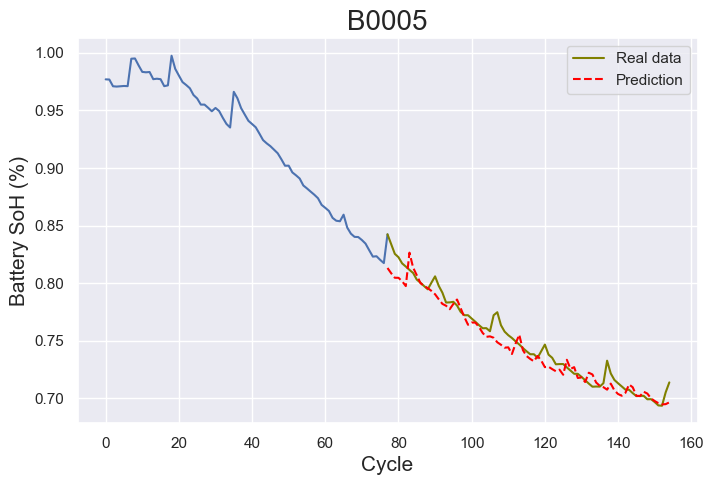

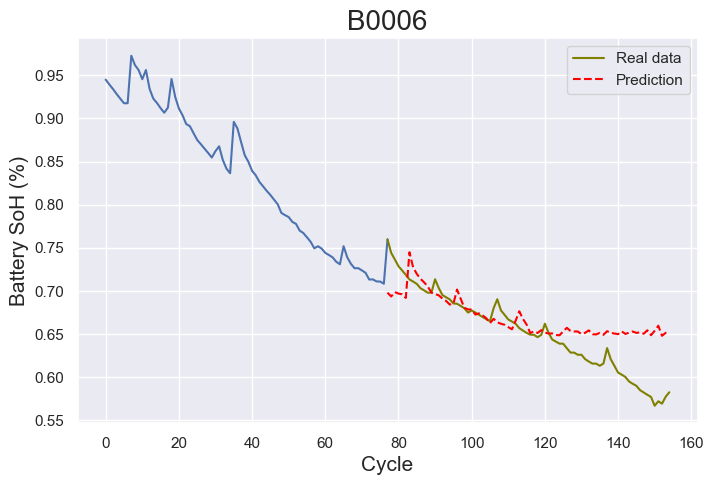

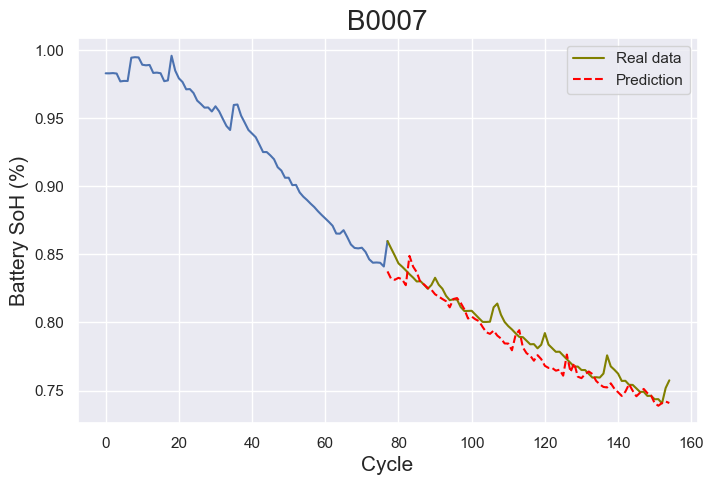

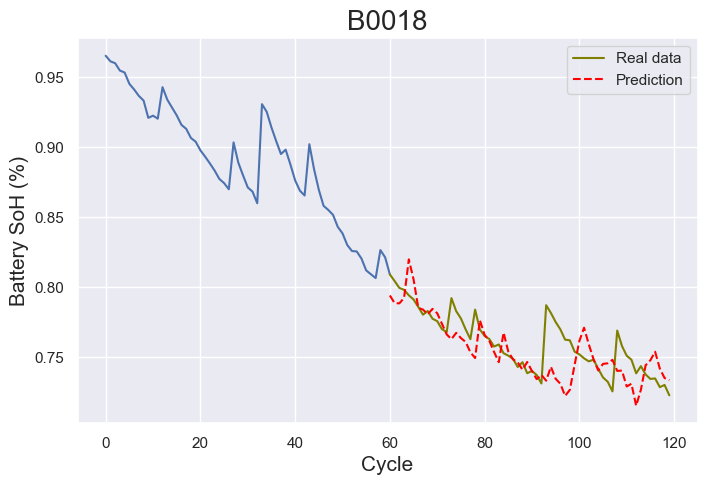

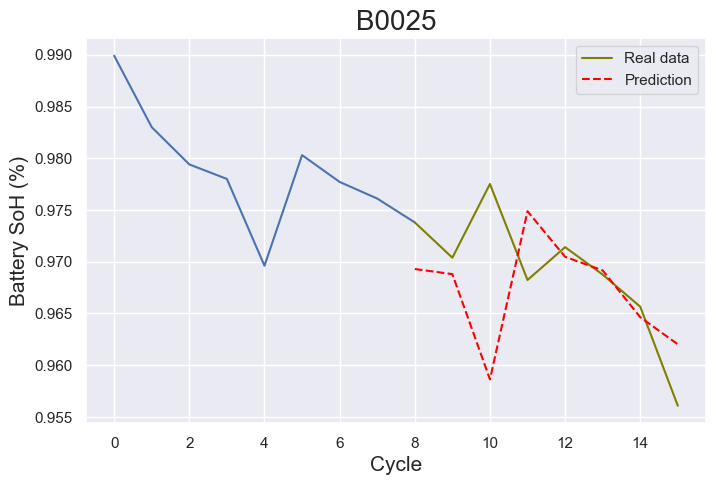

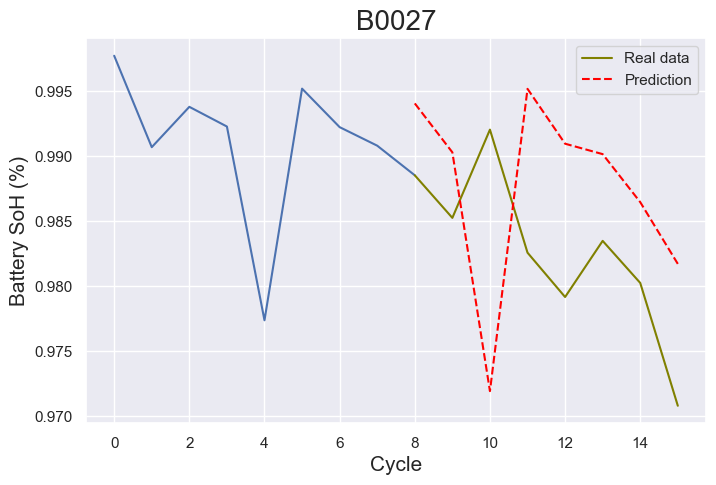

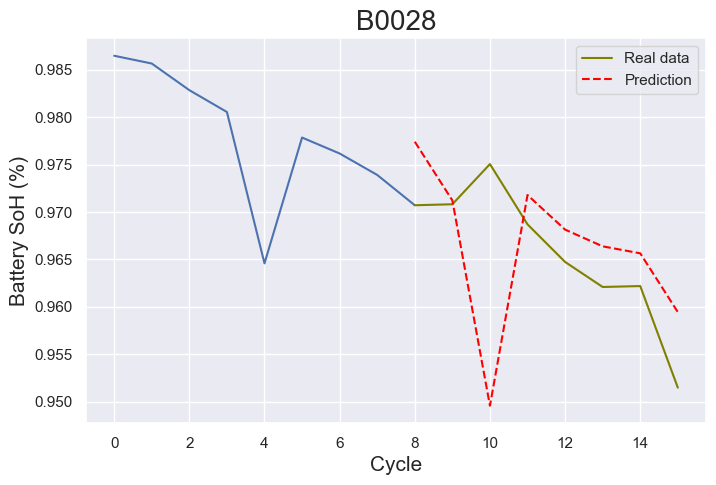

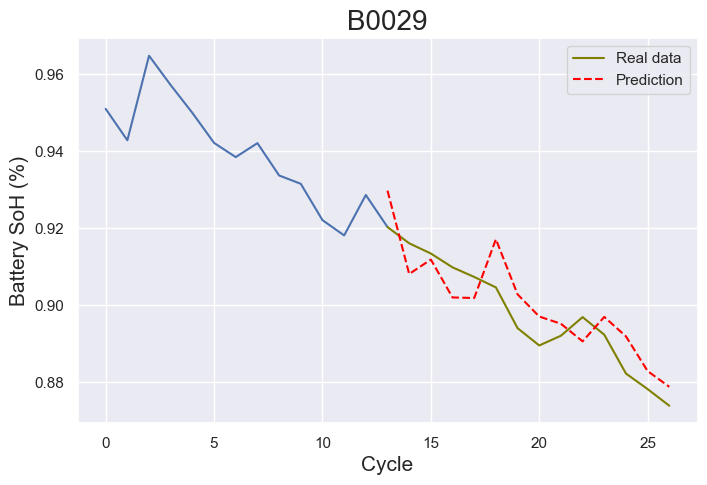

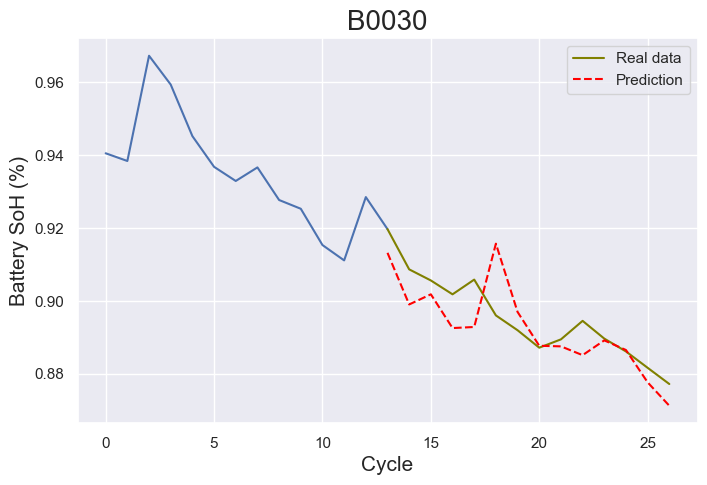

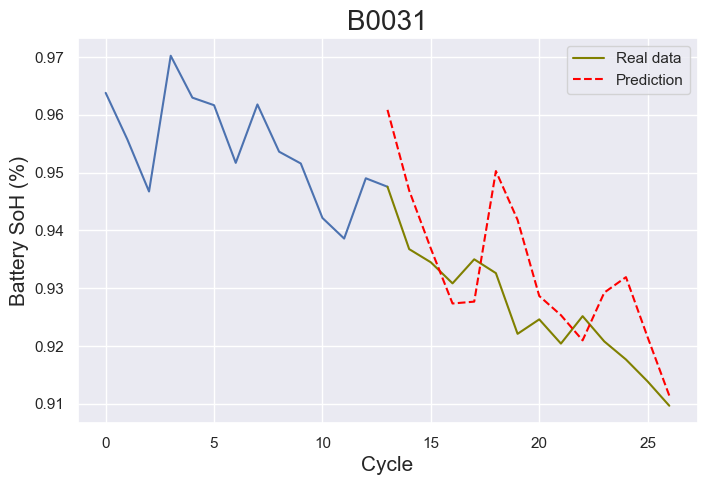

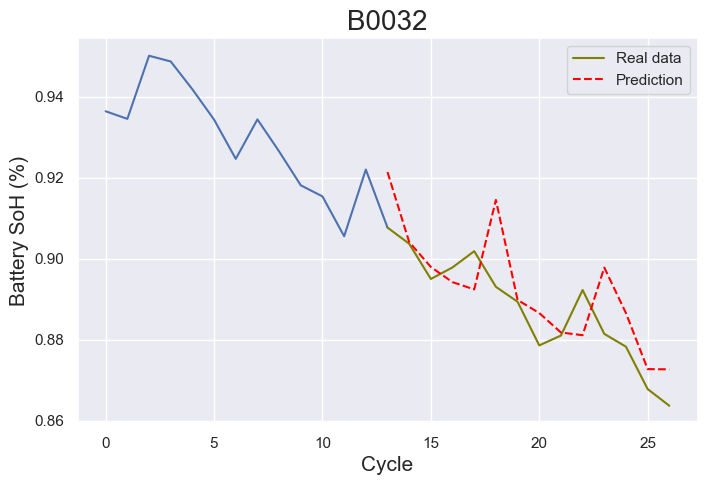

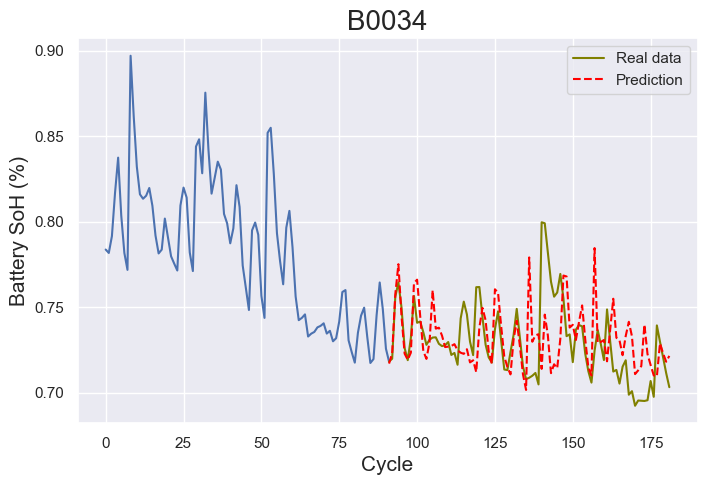

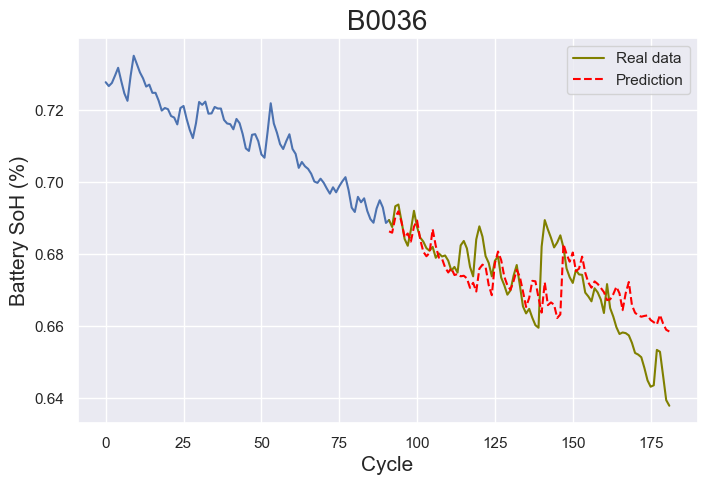

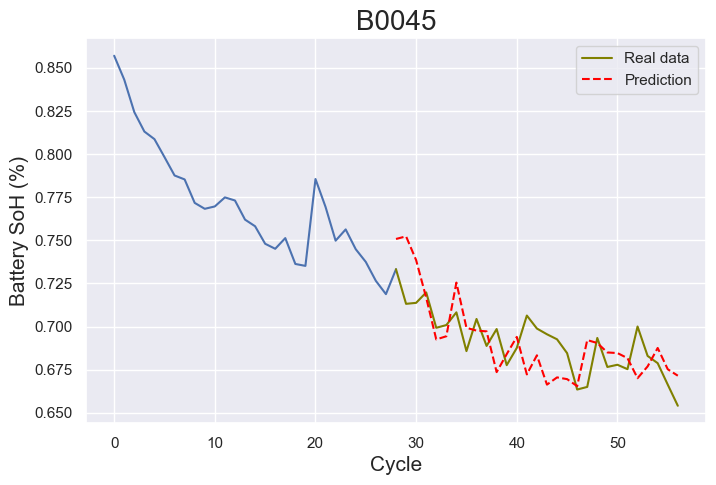

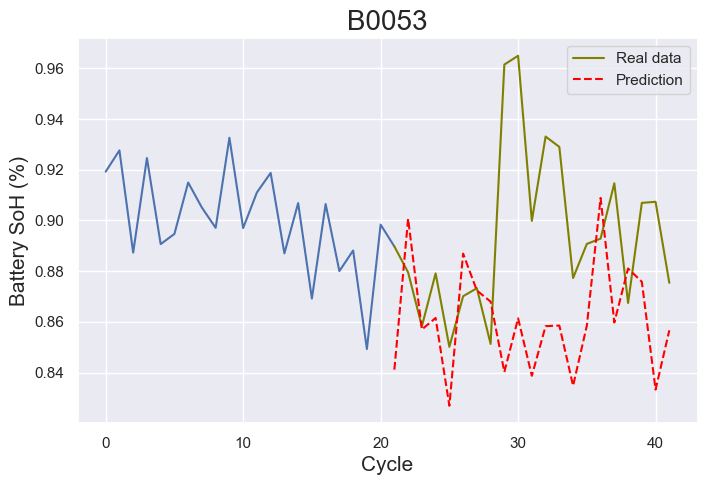

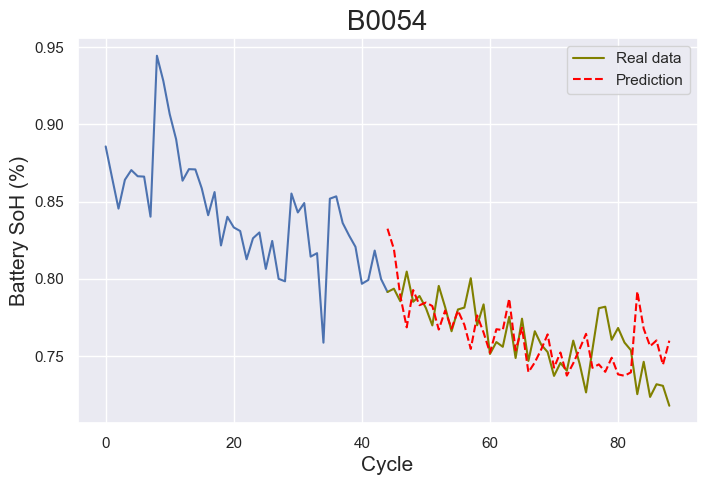

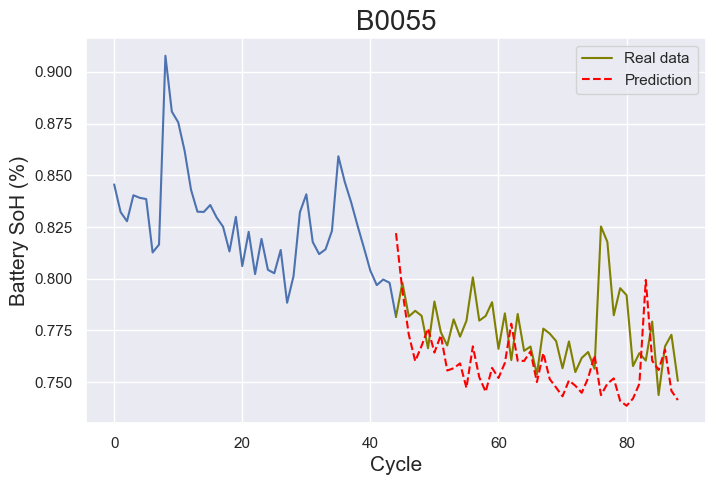

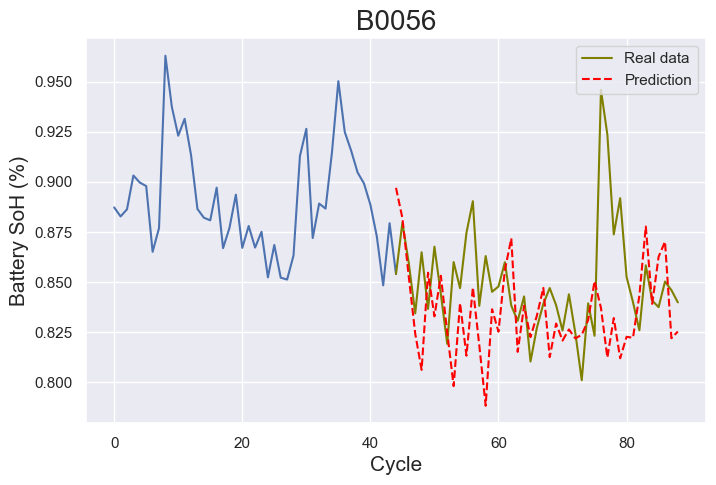

In [2]:
from assets.plots import plot_predicted_capacity

model = torch.load('./models_7_7/trained_model_0.011623_1301.pt', map_location=device)
model.eval()

evaluations = plot_predicted_capacity(model, train_dataset, test_dataset, NUM_CYCLES)

B0005 - 78 - MSE:0.000108, RMSE:0.010377, MAE:0.007745, MAX_ERR:0.029232
B0006 - 78 - MSE:0.001250, RMSE:0.035354, MAE:0.025871, MAX_ERR:0.087582
B0007 - 78 - MSE:0.000109, RMSE:0.010460, MAE:0.008315, MAX_ERR:0.024070
B0018 - 60 - MSE:0.000341, RMSE:0.018479, MAE:0.013899, MAX_ERR:0.053912
B0025 - 8 - MSE:0.000058, RMSE:0.007589, MAE:0.004987, MAX_ERR:0.018880
B0027 - 8 - MSE:0.000120, RMSE:0.010954, MAE:0.009856, MAX_ERR:0.020106
B0028 - 8 - MSE:0.000101, RMSE:0.010058, MAE:0.006849, MAX_ERR:0.025481
B0029 - 14 - MSE:0.000053, RMSE:0.007305, MAE:0.006743, MAX_ERR:0.012511
B0030 - 14 - MSE:0.000069, RMSE:0.008289, MAE:0.006401, MAX_ERR:0.019691
B0031 - 14 - MSE:0.000103, RMSE:0.010162, MAE:0.008517, MAX_ERR:0.019718
B0032 - 14 - MSE:0.000099, RMSE:0.009968, MAE:0.007899, MAX_ERR:0.021462
B0034 - 91 - MSE:0.000590, RMSE:0.024280, MAE:0.017094, MAX_ERR:0.085682
B0036 - 91 - MSE:0.000084, RMSE:0.009165, MAE:0.006862, MAX_ERR:0.021935
B0045 - 29 - MSE:0.000315, RMSE:0.017743, MAE:0.014563

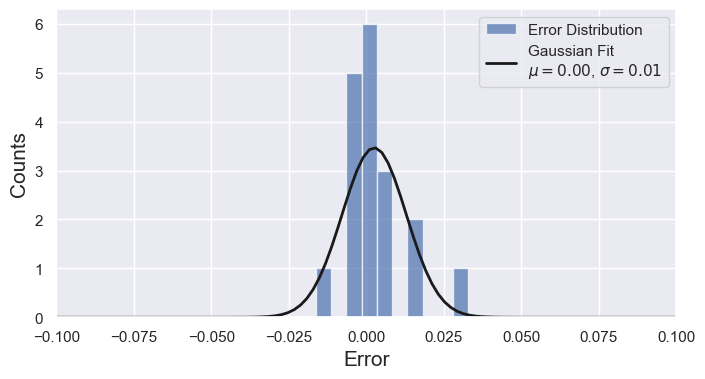

In [3]:
from assets.metrics import report_metrics
from assets.plots import plot_error_histogram

MSEs = []
RMSEs = []
MAEs = []
MAX_ERRs = []
errors = [] 
for name, label, pred in evaluations:
    error = label - pred
    MSE, RMSE, MAE, MAX_ERR = report_metrics(label, pred)
    print(f"{name} - {len(pred)} - MSE:{MSE:.6f}, RMSE:{RMSE:.6f}, MAE:{MAE:.6f}, MAX_ERR:{MAX_ERR:.6f}")

    MSEs.append(MSE)
    RMSEs.append(RMSE)
    MAEs.append(MAE)
    MAX_ERRs.append(MAX_ERR)
    errors.append(np.mean(error))


print(f"Average - MSE:{np.mean(MSEs):.6f}, RMSE:{np.mean(RMSEs):.6f}, MAE:{np.mean(MAEs):.6f}, MAX_ERR:{np.mean(MAX_ERRs):.6f}")
plot_error_histogram(errors)

In [4]:
sum(p.numel() for p in model.parameters())

142097

In [5]:
np.sqrt(0.000491)

0.022158519806160338